<a href="https://colab.research.google.com/github/sakshimahadik463/Machine-Learning-with-python/blob/main/h1n1_vaccine(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [171]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [172]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [173]:
df.shape

(26707, 34)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [175]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [176]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

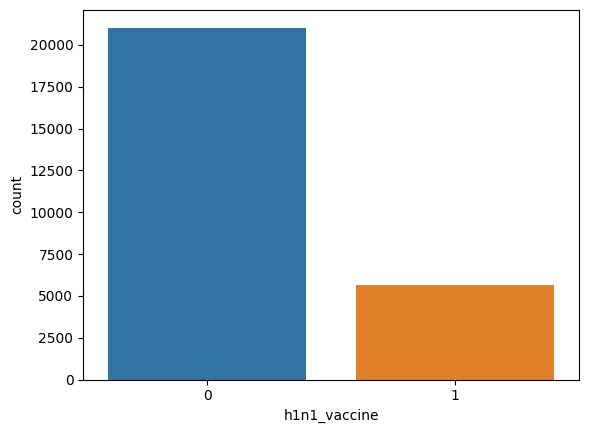

In [177]:
sns.countplot(x="h1n1_vaccine",data=df)

In [178]:
pd.crosstab(df["h1n1_vaccine"],df["sex"])

sex,Female,Male
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [179]:
pd.crosstab(df["h1n1_vaccine"],df["marital_status"])

marital_status,Married,Not Married
h1n1_vaccine,,
0,10387,9494
1,3168,2250


In [180]:
pd.crosstab(df["h1n1_vaccine"],df["housing_status"])

housing_status,Own,Rent
h1n1_vaccine,,
0,14577,4810
1,4159,1119


In [181]:
pd.crosstab(df["h1n1_vaccine"],df["employment"])

employment,Employed,Not in Labor Force,Unemployed
h1n1_vaccine,,,
0,10637,7988,1216
1,2923,2243,237


In [182]:
pd.crosstab(df["h1n1_vaccine"],df["census_msa"])

census_msa,"MSA, Not Principle City","MSA, Principle City",Non-MSA
h1n1_vaccine,,,
0,9178,6183,5672
1,2467,1681,1526


In [183]:
pd.crosstab(df["h1n1_vaccine"],df["race"])

race,Black,Hispanic,Other or Multiple,White
h1n1_vaccine,,,,
0,1803,1390,1263,16577
1,315,365,349,4645


<Axes: xlabel='h1n1_vaccine', ylabel='count'>

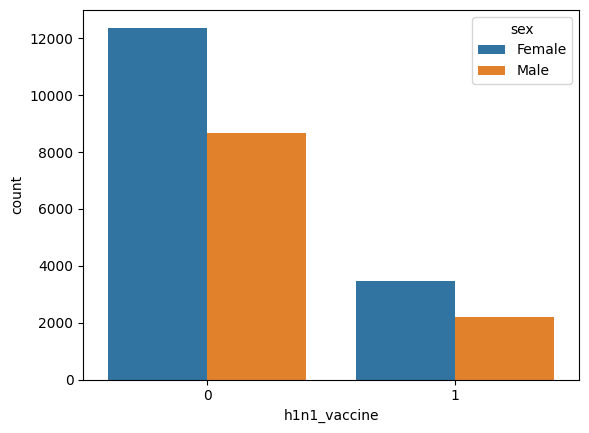

In [184]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

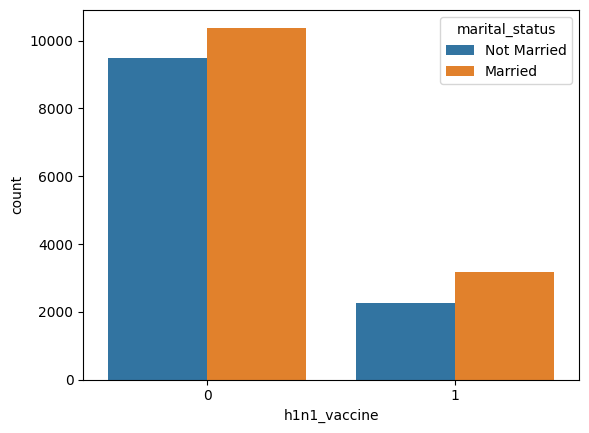

In [185]:
sns.countplot(x="h1n1_vaccine",hue="marital_status",data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

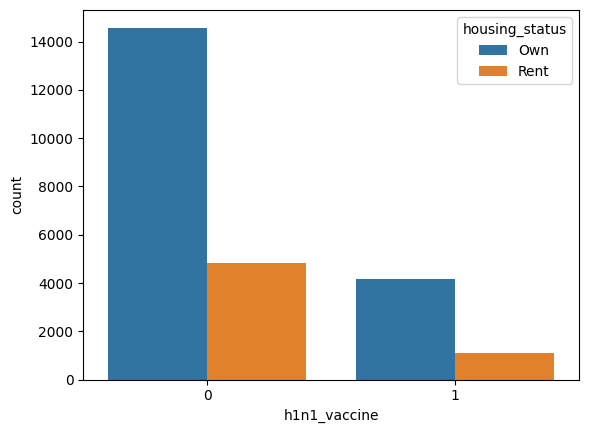

In [186]:
sns.countplot(x="h1n1_vaccine",hue="housing_status",data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

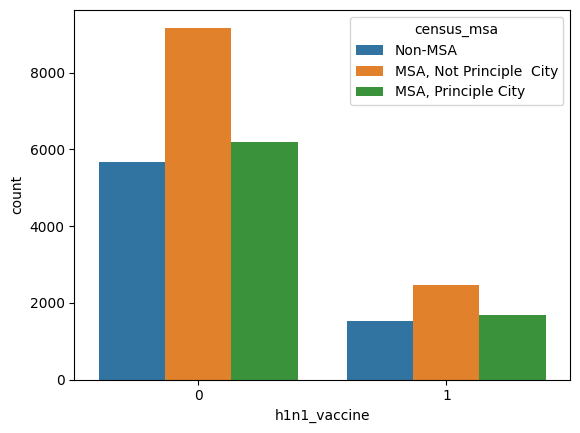

In [187]:
sns.countplot(x="h1n1_vaccine",hue="census_msa",data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

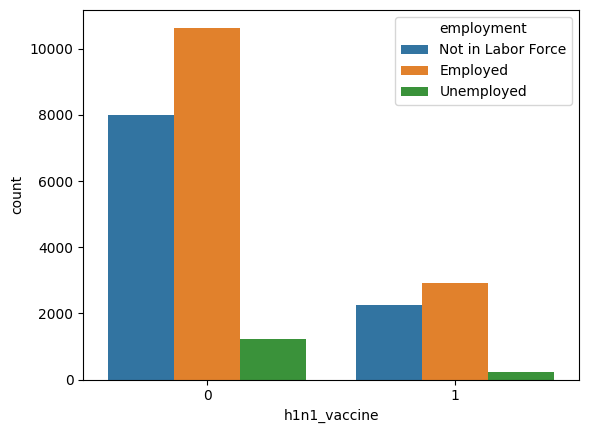

In [188]:
sns.countplot(x="h1n1_vaccine",hue="employment",data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

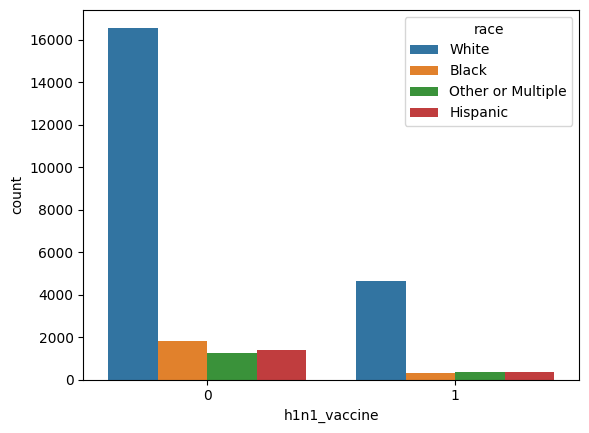

In [189]:
sns.countplot(x="h1n1_vaccine",hue="race",data=df)

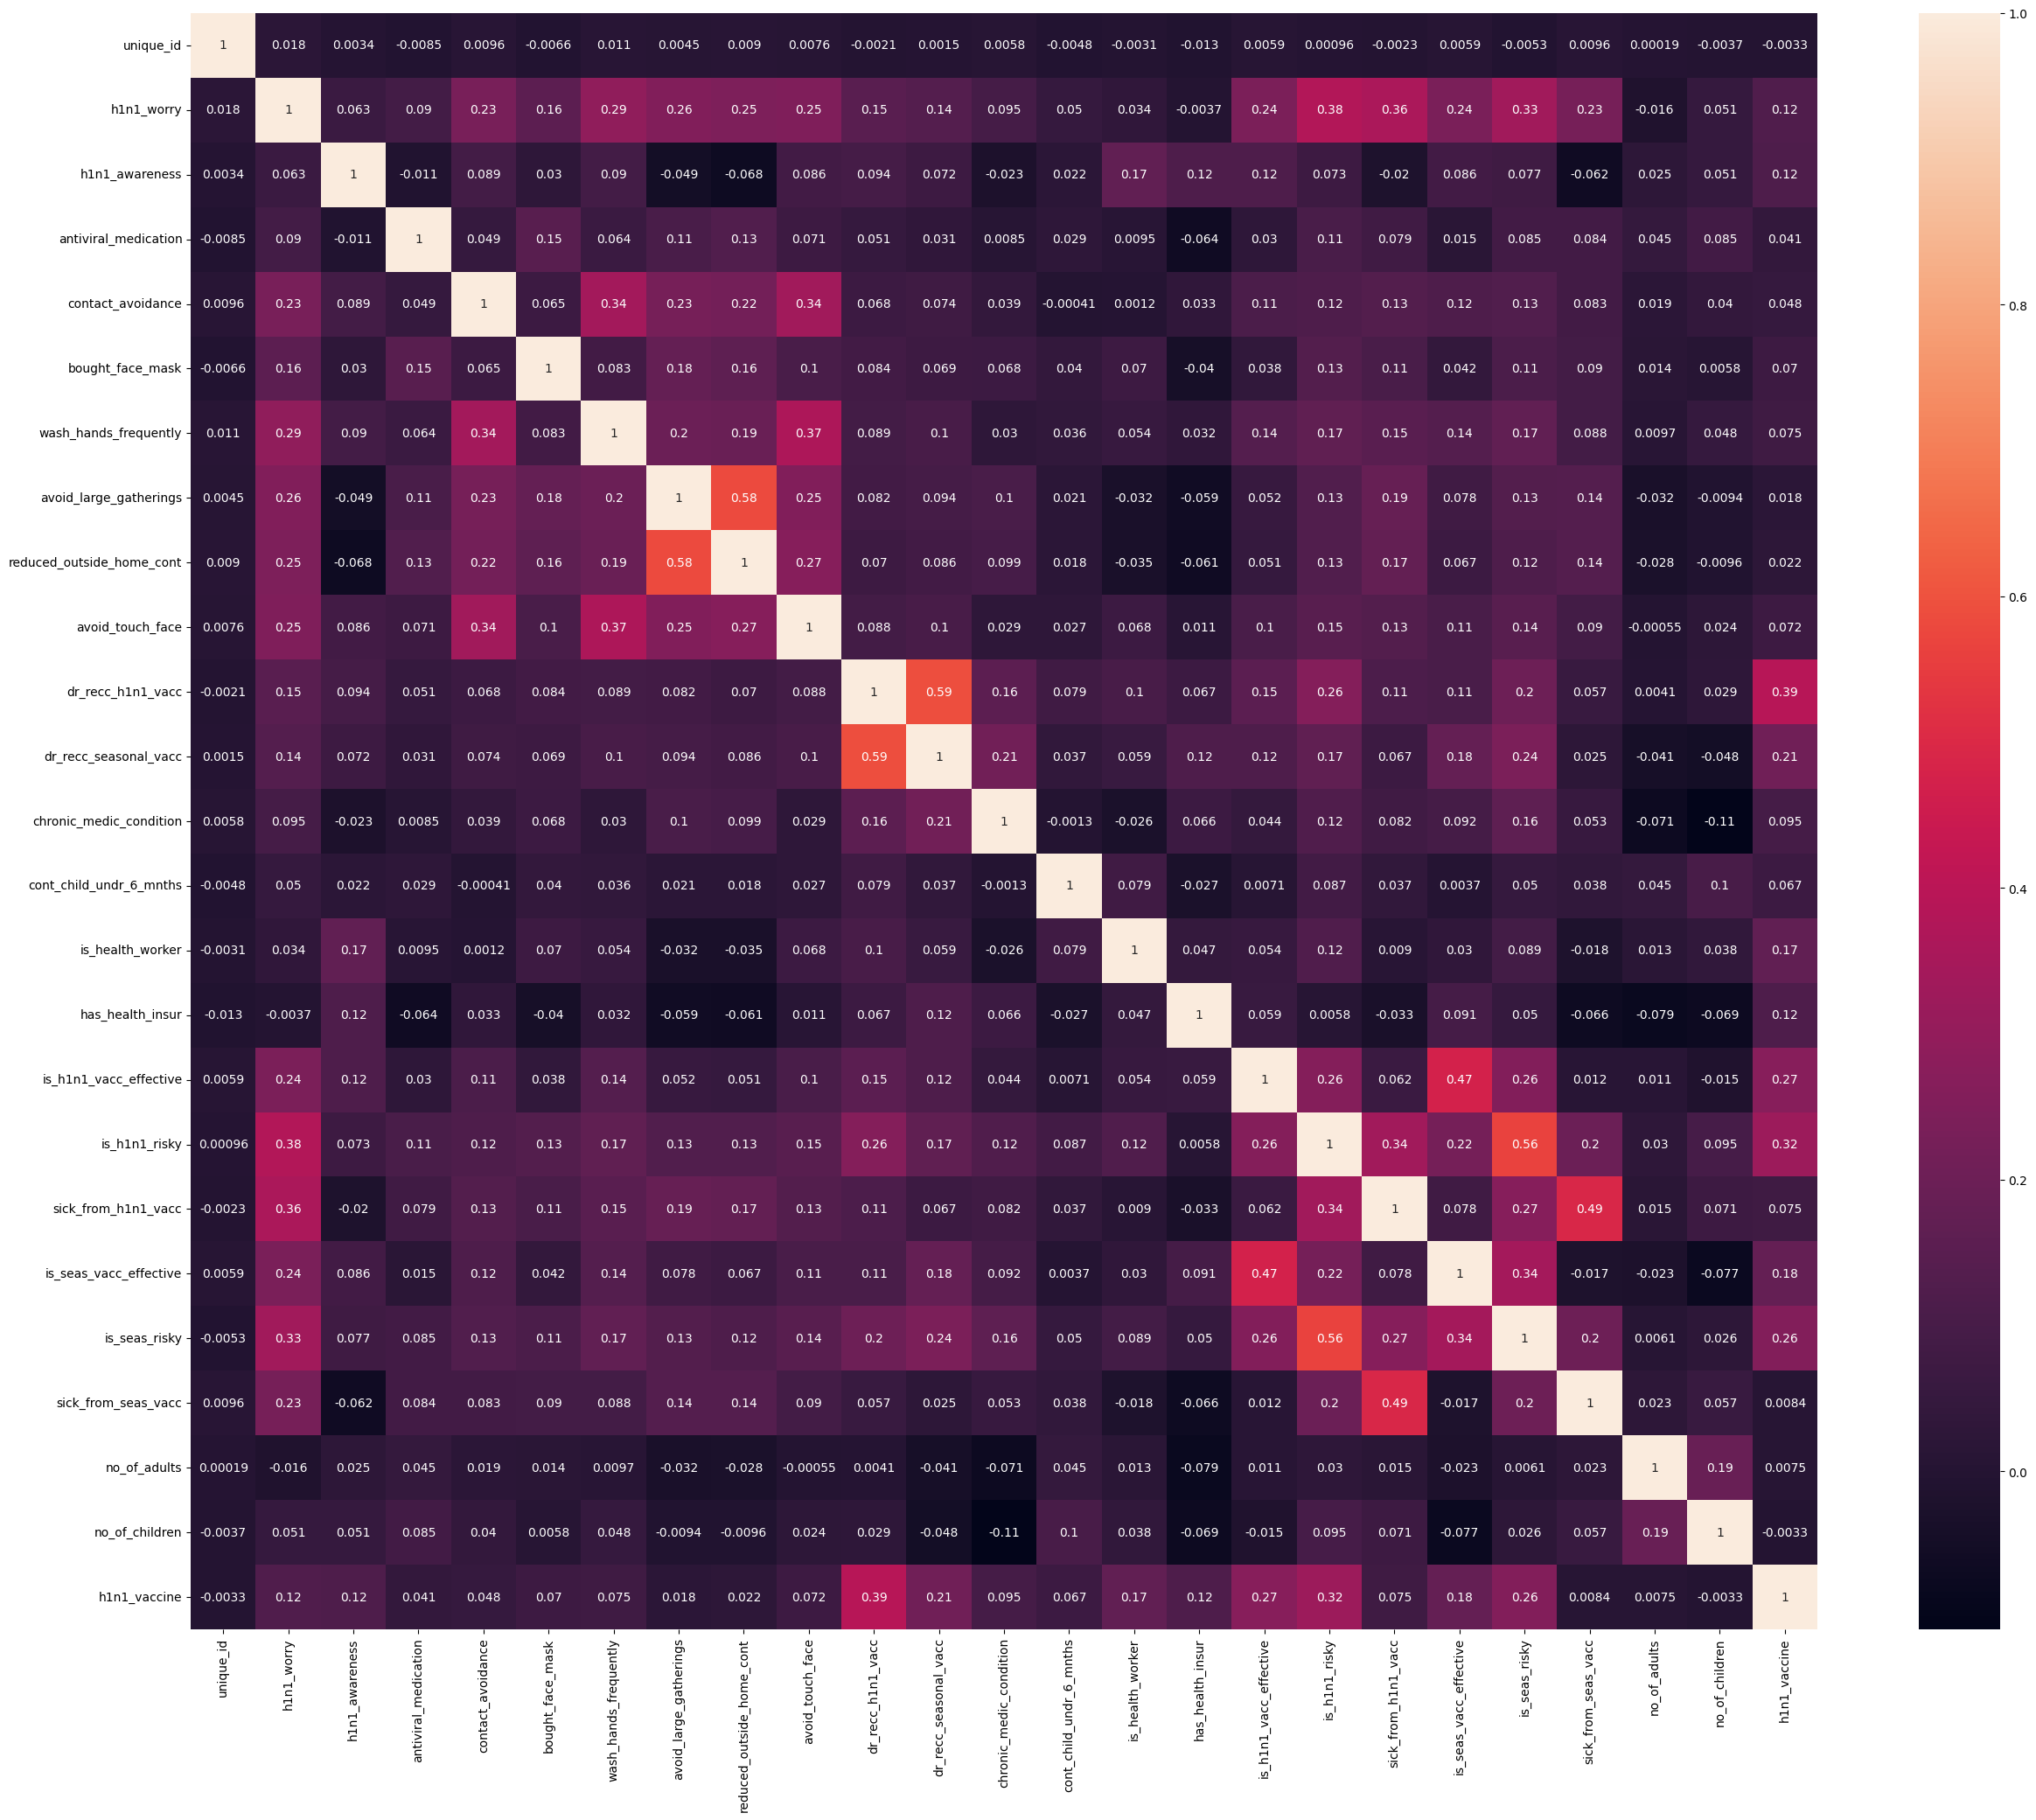

In [190]:
plt.figure(figsize=(30,24))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [191]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [192]:
df.isnull().sum().sort_values(ascending=False)

has_health_insur             12274
income_level                  4423
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
housing_status                2042
employment                    1463
marital_status                1408
qualification                 1407
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
sick_from_seas_vacc            537
is_seas_risky                  514
is_seas_vacc_effective         462
sick_from_h1n1_vacc            395
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
no_of_children                 249
no_of_adults                   249
contact_avoidance              208
avoid_touch_face               128
h1n1_awareness                 116
h1n1_worry                      92
avoid_large_gatherings          87
reduced_outside_home_cont       82
antiviral_medication            71
wash_hands_frequently           42
bought_face_mask                19
census_msa          

In [193]:
df.drop("has_health_insur",axis=1,inplace=True)

In [194]:
df.drop("income_level",axis=1,inplace=True)

In [195]:
df.shape

(26707, 32)

In [196]:
df.dropna(inplace=True)

In [197]:
df=df.drop(['age_bracket','is_h1n1_vacc_effective','is_seas_vacc_effective','unique_id','qualification',],axis=1)

In [198]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_risky                0
sick_from_seas_vacc          0
race                         0
sex                          0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [199]:
df.shape

(21710, 27)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21710 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 21710 non-null  float64
 1   h1n1_awareness             21710 non-null  float64
 2   antiviral_medication       21710 non-null  float64
 3   contact_avoidance          21710 non-null  float64
 4   bought_face_mask           21710 non-null  float64
 5   wash_hands_frequently      21710 non-null  float64
 6   avoid_large_gatherings     21710 non-null  float64
 7   reduced_outside_home_cont  21710 non-null  float64
 8   avoid_touch_face           21710 non-null  float64
 9   dr_recc_h1n1_vacc          21710 non-null  float64
 10  dr_recc_seasonal_vacc      21710 non-null  float64
 11  chronic_medic_condition    21710 non-null  float64
 12  cont_child_undr_6_mnths    21710 non-null  float64
 13  is_health_worker           21710 non-null  flo

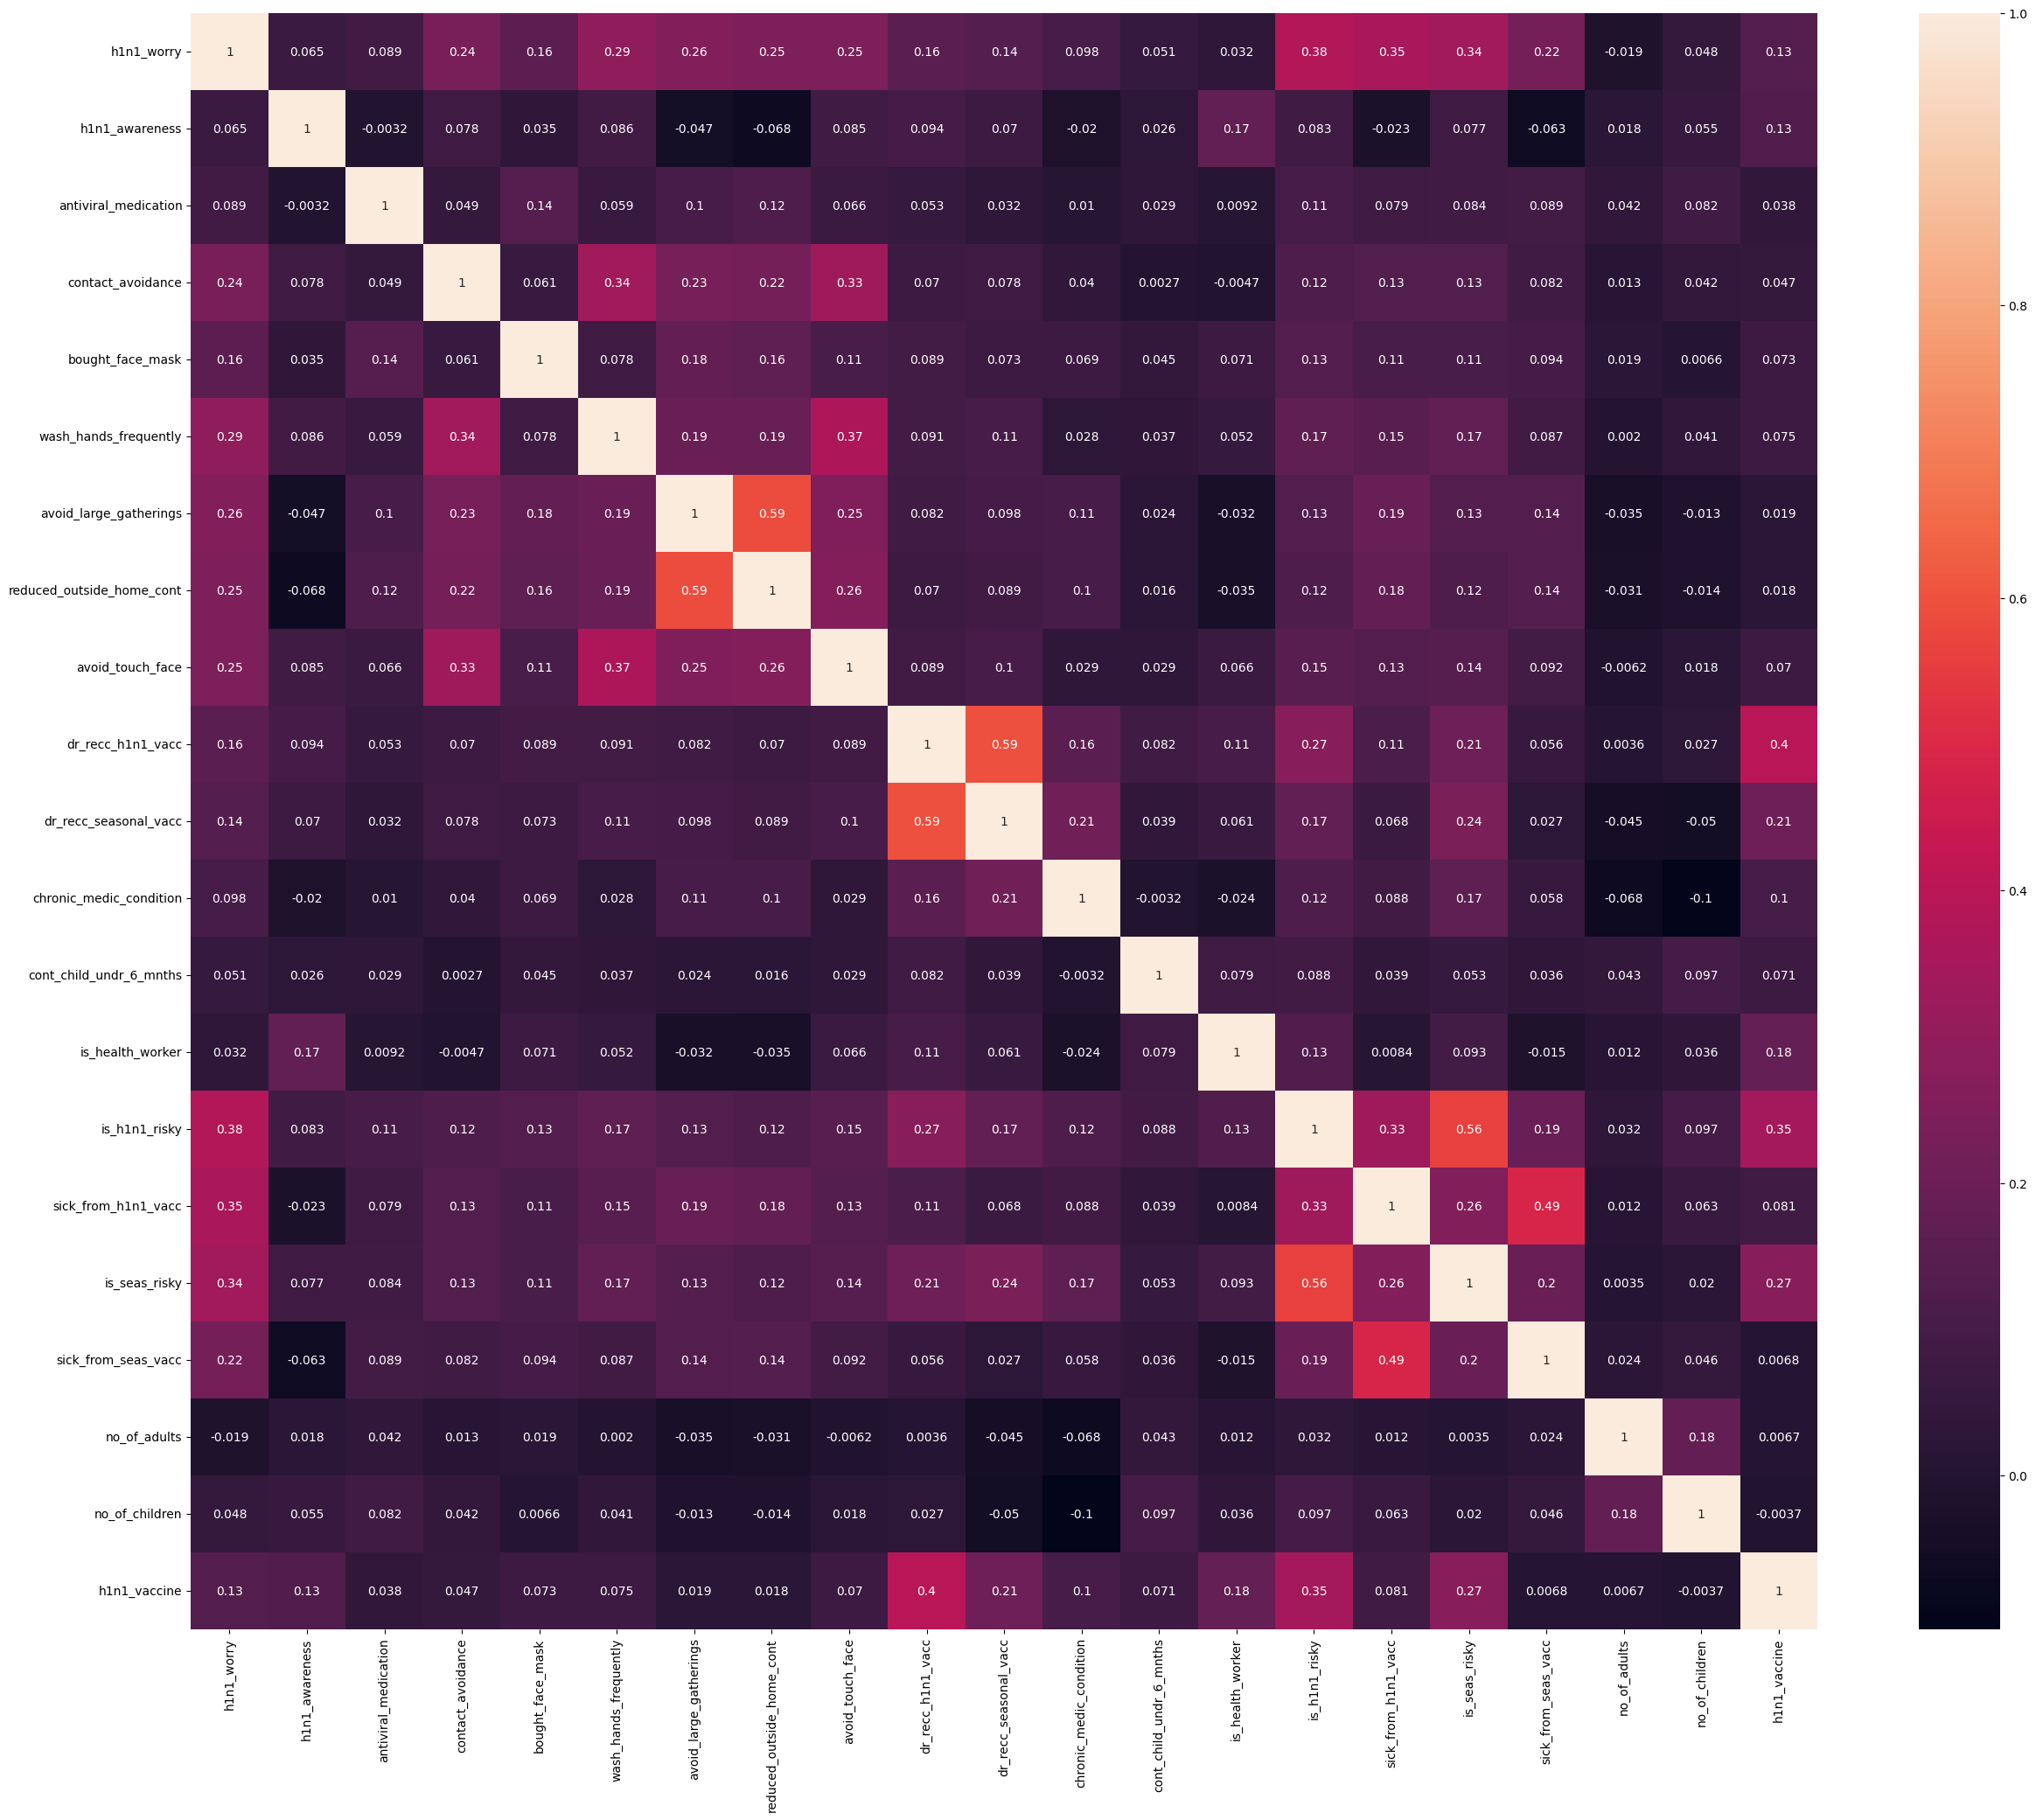

In [201]:
plt.figure(figsize=(30,24))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [202]:
df=pd.get_dummies(df,columns=['sex','marital_status','housing_status','employment','race','census_msa'])

In [203]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,employment_Employed,employment_Not in Labor Force,employment_Unemployed,race_Black,race_Hispanic,race_Other or Multiple,race_White,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,1,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1,1,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1,0,1,0


In [204]:
x=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [205]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [206]:
model=LogisticRegression()

In [207]:
model.fit(x_train,y_train)

LogisticRegression()

In [208]:
model.score(x_train,y_train)

0.8210831085082582

In [209]:
model.score(x_test,y_test)

0.8218946721940734

In [210]:
predictions=model.predict(x_test)

In [211]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8218946721940734

In [212]:
from sklearn import metrics

<Axes: >

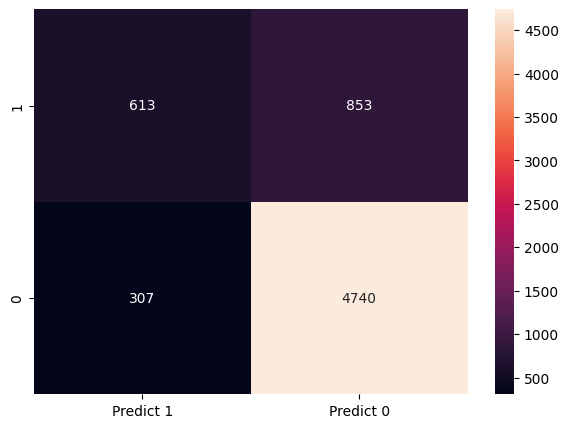

In [213]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                   columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g') 

In [214]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5047
           1       0.67      0.42      0.51      1466

    accuracy                           0.82      6513
   macro avg       0.76      0.68      0.70      6513
weighted avg       0.81      0.82      0.81      6513



In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
model2=DecisionTreeClassifier()

In [217]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [218]:
model2.score(x_train,y_train)

0.9979601237086267

In [219]:
model2.score(x_test,y_test)

0.725779210809151

In [220]:
model2=DecisionTreeClassifier(max_depth=5,criterion="entropy")

In [221]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [222]:
model2.score(x_train,y_train)

0.8236494044877278

In [223]:
model2.score(x_test,y_test)

0.8160601873176724

In [224]:
from sklearn.ensemble import BaggingClassifier

In [225]:
model3=BaggingClassifier(n_estimators=10,base_estimator=model3)

In [226]:
model3.fit(x_train,y_train)

BaggingClassifier(base_estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                         max_depth=5)))

In [227]:
model3.score(x_train,y_train)

0.8274659472264263

In [228]:
model3.score(x_test,y_test)

0.8198986642100414

In [229]:
from sklearn.ensemble import AdaBoostClassifier

In [230]:
model4=AdaBoostClassifier(n_estimators=80,learning_rate=1)

In [231]:
model4.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=80)

In [232]:
model4.score(x_train,y_train)

0.8215437257353425

In [233]:
model4.score(x_test,y_test)

0.820205742361431

In [234]:
from sklearn.ensemble import GradientBoostingClassifier

In [235]:
model5=GradientBoostingClassifier(n_estimators=50,max_depth=3)

In [236]:
model5.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [237]:
model5.score(x_train,y_train)

0.8274001447654142

In [238]:
model5.score(x_test,y_test)

0.8194380469829572

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
model6=RandomForestClassifier(max_depth=5)

In [241]:
model6.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [242]:
model6.score(x_train,y_train)

0.811344344278476

In [243]:
model6.score(x_test,y_test)

0.8091509289114079

In [244]:
from sklearn.svm import SVC

In [245]:
model7=SVC()

In [246]:
model7.fit(x_train,y_train)

SVC()

In [247]:
model7.score(x_train,y_train)

0.8269395275383299

In [248]:
model7.score(x_test,y_test)

0.8200522032857362